# Signal processing course 2018/2019-1 @ ELTE
# Assignment 3
## 10.08.2018

## Task 1

### Low-pass filter (LPF) and the Bode plot

A low-pass filter (LPF) is a filter that passes signals with a frequency lower than a selected cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency. The exact frequency response of the filter depends on the filter design.[\[1\]](https://en.wikipedia.org/wiki/Low-pass_filter)
We can construct a wingle pole LPF, simplest way as shown in the first picture:

![Low-pass filter](img\low-pass_filter_RC.svg "First order low-pass filter")

This simple LPF circuit consists of a resistor in series with a load, and a capacitor in parallel with the load. The capacitor exhibits reactance, and blocks low-frequency signals, forcing them through the load instead. At higher frequencies the reactance drops, and the capacitor effectively functions as a short circuit. The combination of resistance and capacitance gives the time constant of the filter $\tau = RC$, where in SI, $R$ is measured in Ohms ($\Omega$) and $C$ is measured in Farads ($F$).[\[2\]](https://www.allaboutcircuits.com/textbook/direct-current/chpt-16/voltage-current-calculations/). The *break frequency*, also called the *turnover frequency* or *cutoff frequency* (in Hz), is determined by the time constant:

$$
f_{c} = \frac{1}{2 \pi} \omega_{c} = \frac{1}{2 \pi} \frac{1}{\tau} = \frac{1}{2 \pi} \frac{1}{RC}
$$

This circuit may be understood by considering the time the capacitor needs to charge or discharge through the resistor:

* At low frequencies, there is plenty of time for the capacitor to charge up to practically the same voltage as the input voltage.
* At high frequencies, the capacitor only has time to charge up a small amount before the input switches direction. The output goes up and down only a small fraction of the amount the input goes up and down. At double the frequency, there's only time for it to charge up half the amount.

Another way to understand this circuit is through the concept of reactance at a particular frequency:

* Since direct current (DC) cannot flow through the capacitor, DC input must flow out the path marked $V_{out}$ (analogous to removing the capacitor).
* Since alternating current (AC) flows very well through the capacitor, almost as well as it flows through solid wire, AC input flows out through the capacitor, effectively short circuiting to ground (analogous to replacing the capacitor with just a wire).

The capacitor is not an "on/off" object (like the block or pass fluidic explanation above). The capacitor variably acts between these two extremes. It is the *Bode plot* and frequency response that show this variability, which is as follows:

![Bode of LPF](img\lpf_bode.png "Bode plot of a first-order (one-pole) low-pass filter")

The Bode plot for a linear, time-invariant system with transfer function $H(s)$ ($s$ being the complex frequency in the Laplace domain) consists of a magnitude plot and a phase plot.[\[3\]](https://en.wikipedia.org/wiki/Bode_plot)

The *Bode magnitude plot* is the graph of the function $\left| H(s = j \omega) \right|$ of frequency $\omega$. The $\omega$-axis of the magnitude plot is logarithmic and the magnitude is given in decibels, i.e., a value for the magnitude $\left| H \right|$ is plotted on the axis at $20 \log_{10} \left| H \right|$.

The *Bode phase plot* is the graph of the Argument (complex analysis)|phase, commonly expressed in degrees, of the transfer function $ \arg \left( H(s = j \omega) \right)$ as a function of $\omega$. The phase is plotted on the same logarithmic $\omega$-axis as the magnitude plot, but the value for the phase is plotted on a linear vertical axis.


For a simple, single pole LPF, this could be calculated as follows[\[4\]](https://slideplayer.com/slide/4225151/):

$$
H \left(j \omega \right) = \frac{1}{1 + j \omega RC} = \frac{1}{1 + j \omega \tau} = \frac{1}{1 + j \tfrac{\omega}{w_{c}}}
$$

We need the absolute (real) values of this function, thus:

$$
Re \left( H \left(j \omega \right) \right) = \frac{1}{\sqrt{1 + \left( \tfrac{\omega}{w_{c}} \right)^{2}}}
$$

At the last step we convert this to decibels:

$$
Re \left( H \left(j \omega \right) \right)_{dB} = 20 \cdot \log_{10} Re \left( H \left(j \omega \right) \right) = 20 \cdot \log_{10} \left( \frac{1}{\sqrt{1 + \left( \tfrac{\omega}{w_{c}} \right)^{2}}} \right)
$$

### Nyquist plot

A Nyquist plot is a parametric plot of a frequency response used in signal processing. The most common use of Nyquist plots is for assessing the stability of a system with feedback. In Cartesian coordinates, the real part of the transfer function is plotted on the X axis. The imaginary part is plotted on the Y axis. The frequency is swept as a parameter, resulting in a plot per frequency.[\[5\]](https://en.wikipedia.org/wiki/Nyquist_stability_criterion)
Summed, one can construct the Nyquist plot, using the transfer function $H \left(j \omega \right)$ plotting the following function:

$$
H_{Im} \left( H_{Re} \right)
$$

Where $H_{Re}$ is the argument of $H_{Im}$. It results in something, like the following plot:

![Nyquist of LPF](img\lpf_nyquist.svg "Nyquist plot of a first-order (one-pole) low-pass filter")

In [330]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cmath
from scipy import signal

In [90]:
sns.set()

### Constructing transfer function

In [321]:
def TransferFunction(w_max, tau):
    
    # Sampling rate: 100 Hz
    SampRate = w * 100
    freqs = np.linspace(0, w_max, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate, dtype=np.complex_)
    signal_bode = np.empty(SampRate)
    signal_arg = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        
        signal[i] = (1/(1 + 1j * (w_max/SampRate * i) * tau))

        signal_bode[i] = 20 * np.log10(signal[i].real)
        signal_arg[i] = np.degrees(cmath.phase(signal[i]))
        i += 1
    
    return(signal, signal_bode, signal_arg, freqs)

In [326]:
# Resistance's magnitude in the low-pass filter
# Measured in Ohm (greek Omega)
LPF_R = 1e+5

# Capacitor's magnitude on the low-pass filter
# Measured Farads (F)
LPF_C = 1e-05

# Time constant for LPF with given characteristics
tau = LPF_R * LPF_C

In [327]:
# Maximal frequency
w_max = 10

signal, signal_bode, signal_arg, freqs = TransferFunction(w_max, tau)

### Bode diagram

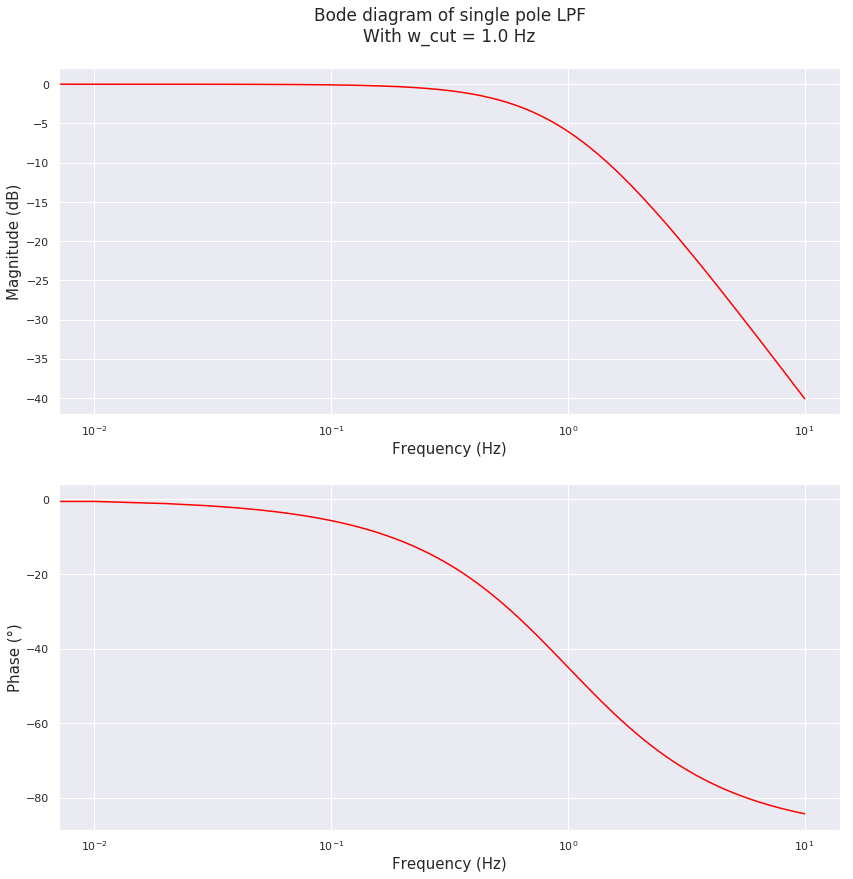

In [328]:
fig_1_bode, axes_1_bode = plt.subplots(nrows=2, ncols = 1, figsize=(14,14))

axes_1_bode[0].set_title("Bode diagram of single pole LPF\nWith w_cut = "+ str(1/tau) +" Hz\n", fontsize=17)

axes_1_bode[0].plot(freqs, signal_bode, c="red")
axes_1_bode[1].plot(freqs, signal_arg, c="red")

axes_1_bode[0].set_xscale("log")
axes_1_bode[1].set_xscale("log")

axes_1_bode[0].set_xlabel("Frequency (Hz)", fontsize=15)
axes_1_bode[0].set_ylabel("Magnitude (dB)", fontsize=15)

axes_1_bode[1].set_xlabel("Frequency (Hz)", fontsize=15)
axes_1_bode[1].set_ylabel("Phase (°)", fontsize=15)

plt.show()

### Nyquist plot

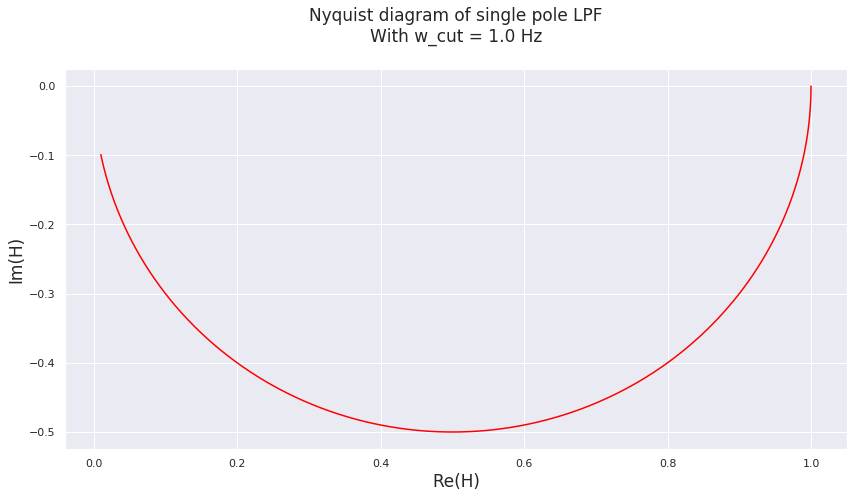

In [329]:
fig_1_nyquist, axes_1_nyquist = plt.subplots(figsize=(14,7))

axes_1_nyquist.plot(signal.real, signal.imag, c="red")

axes_1_nyquist.set_title("Nyquist diagram of single pole LPF\nWith w_cut = "+ str(1/tau) +" Hz\n", fontsize=17)
axes_1_nyquist.set_xlabel("Re(H)", fontsize=17)
axes_1_nyquist.set_ylabel("Im(H)", fontsize=17)

plt.show()

### Filtering with LPF

#### Constructing low-pass filter

In [499]:
def LFP(t, tau, signal_in, order):
    
    # Sampling rate: 1000 Hz/seconds
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # Cut-off frequency of the filter
    w_cut = 1/tau
    
    # Normalize the frequency
    # From Shanon theoreom we must use a sampling frequency larger than the maximum
    # frequency you want to catch in the signal
    w = w_cut / ((SampRate / t) / 2)
    
    # Calculate coefficients for low-pass Butterworth filter
    b, a = signal.butter(order, w, 'low')
    
    lfp_output = signal.lfilter(b, a, signal_in)
    
    return(lfp_output, time)

#### Calculate Fourier components

In [461]:
def FourierCoeff(signal, t, N_max, Complex=False):
    
    '''
    Parameters
    ----------
    signal : the periodic function's value as an np.array
    t: an np.linsapce array of points of time, where the signal got evalueted
    N_max : the function will return the first N_max + 1 Fourier coefficients

    Returns
    -------
    if Complex == False, the function returns:

    a_0 : float
    a, b : np.float arrays describing respectively the cosine and sine coefficients

    =======
    if Complex == True, the function returns:

    c : 1-dimensional complex-valued np.array of size N+1
    '''

    # This function computes the one-dimensional n-point discrete Fourier Transform (DFT) 
    # of a real-valued array by means of an efficient algorithm called the Fast Fourier Transform (FFT)
    y = np.fft.rfft(signal) / t.size

    if(Complex):
        return(y)

    else:
        y *= 2
        return(y[0].real, y[1:-1].real, -y[1:-1].imag)

#### Reconstruct original function with Fourier coefficients

In [466]:
def FourierCalcReal(a_0, a, b, t, T, N_max):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    ReconstTime = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array to store the reconstructed function's values
    ReconstFunc = np.empty(SampRate)
    
    # Calculate f(t) values by f(t) ~= a_0/2 + {Sum}_k=1->N (a_k*cos(2*pi*kt/T) + b_k*sin(2*pi*kt/T))
    for dt in range(0,len(ReconstTime)):
        ReconstFunc[dt] = a_0/2
        
        for k in range(1,N_max):
            ReconstFunc[dt] += a[k-1] * np.cos(2 * np.pi * k * ReconstTime[dt] / T) + b[k-1] * np.sin(2 * np.pi * k * ReconstTime[dt] / T)

    return(ReconstFunc, ReconstTime)

In [539]:
def FourierCalcComplex(c, t, T, N_max):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    ReconstTime = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array to store the reconstructed function's values
    ReconstFunc = np.empty(SampRate, dtype=np.complex_)
    
    # Calculate f(t) values by f(t) ~= {Sum}_k=-N->N (c_k*e^(2*pi*kt/T))
    for dt in range(0,len(ReconstTime)):
        ReconstFunc[dt] = 0
        
        for k in range(-N_max,N_max+1):
            if(k >= 0):
                ReconstFunc[dt] += c[k] * cmath.exp(1.0j * 2 * np.pi * k * ReconstTime[dt] / T)
            else:
                ReconstFunc[dt] += np.conj(c[k]) * cmath.exp(1.0j * 2 * np.pi * k * ReconstTime[dt] / T)

    return(ReconstFunc, ReconstTime)

#### Function 1 - Square wave

In [350]:
def f_1(t, width, T):
    '''
    Input parameters:
    
    't': time in seconds
    'tau': bandwidth
    'T': period of signal
    '''
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        if(((t/SampRate * i) % T) < width):
            signal[i] = 1
            i += 1
        else:
            signal[i] = 0
            i += 1

    return(time, signal)

In [503]:
# Order if filter
order_1 = 1

# length of signal in seconds
t_1 = 10

width_1 = 1
T_1 = 2

time_1, signal_in_1 = f_1(t_1, width_1, T_1)
lfp_output_1, lfp_time_1 = LFP(t_1, tau, signal_in_1, order_1)

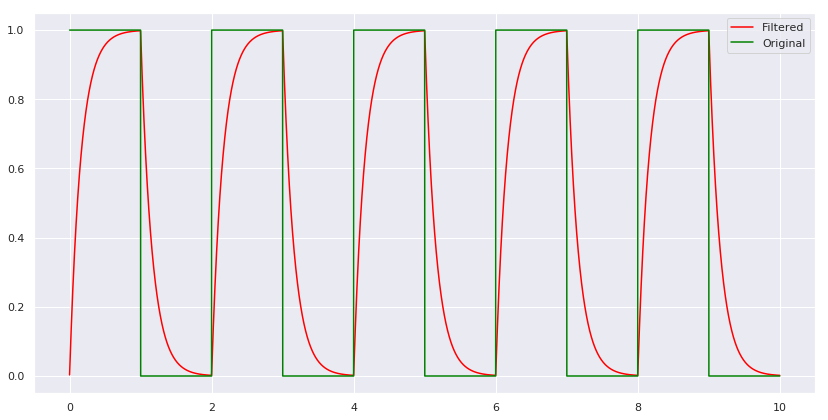

In [504]:
fig_1_lpf, axes_1_lpf = plt.subplots(figsize=(14,7))

axes_1_lpf.plot(lfp_time_1, lfp_output_1, c="red", label="Filtered")
axes_1_lpf.plot(time_1, signal_in_1, c="green", label="Original")

plt.legend()
plt.show()

In [538]:
N_max_1 = 40

c_k_1 = FourierCoeff(lfp_output_1, lfp_time_1, N_max_1, Complex=True)
ReconstFunc_1_Comp, ReconstTime_1_Comp = FourierCalcComplex(c_k_1, t_1, T_1, N_max_1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118


3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164


5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910


7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872


9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999


In [ ]:
fig_f_1_Reconstruct_Complex = plt.figure(figsize=(14,7))

plt.plot(lfp_time_1, lfp_output_1, label="Original function", c="green")
plt.plot(ReconstTime_1_Comp, ReconstFunc_1_Comp.real, label="Reconstructed function", c="red")

plt.title(str(N_max_1) + "th harmonic of Fourier series")
plt.xlabel("Time (s)")
plt.ylabel("Signal value")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### Some extra

#### Function 2 - Sawtooth wave

In [425]:
def f_2(t, h_max, T):
    '''
    Input parameters:
    
    't': time in seconds
    'h_max': maximum value of a 'tooth' 
    'T': period of signal
    '''
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = h_max * (((t/SampRate) * i) % T) / T
        i += 1
        
    return(time, signal)

In [426]:
# Order if filter
order_2 = 1

# length of signal in seconds
t_2 = 10

h_max_2 = 1
T_2 = 2

time_2, signal_in_2 = f_2(t_2, h_max_2, T_2)
lfp_output_2 = LFP(t_2, tau, signal_in_2, order_2)

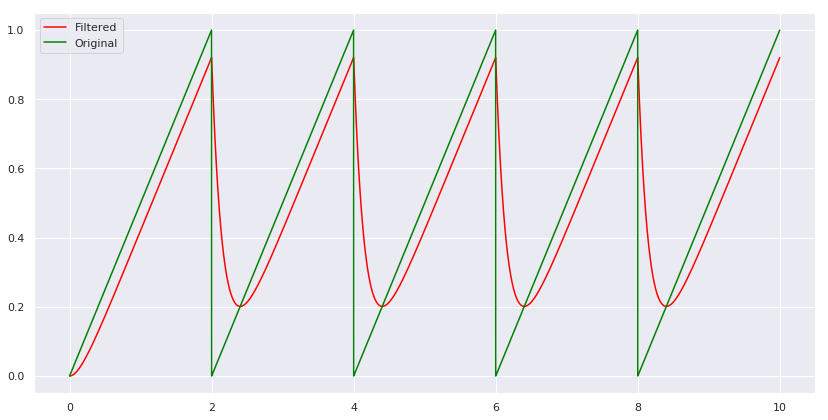

In [432]:
fig_2_lpf, axes_2_lpf = plt.subplots(figsize=(14,7))

axes_2_lpf.plot(time_2, lfp_output_2, c="red", label="Filtered")
axes_2_lpf.plot(time_2, signal_in_2, c="green", label="Original")

plt.legend()
plt.show()

#### Function 3

In [440]:
def f_3(t):
    '''
    Input parameter:
    
    't': time in seconds
    '''
    
    T = 2 * np.pi
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):

        if((t/SampRate * i) % T <= T/2):
            signal[i] = 2 * ((t/SampRate * i) % T)
            i += 1
            
        else:
            signal[i] = 2 * (T - ((t/SampRate * i) % T))
            i += 1
        
    return(time, signal)

In [441]:
# Order if filter
order_3 = 1

# length of signal in seconds
t_3 = 10

time_3, signal_in_3 = f_3(t_3)
lfp_output_3 = LFP(t_3, tau, signal_in_3, order_3)

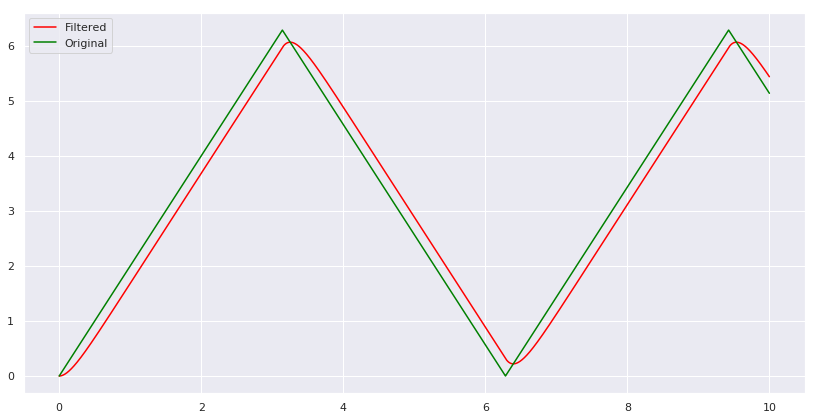

In [442]:
fig_3_lpf, axes_3_lpf = plt.subplots(figsize=(14,7))

axes_3_lpf.plot(time_3, lfp_output_3, c="red", label="Filtered")
axes_3_lpf.plot(time_3, signal_in_3, c="green", label="Original")

plt.legend()
plt.show()

#### Function 4

In [452]:
def f_4(t):
    '''
    Input parameter:
    
    't': time in seconds
    '''
    
    T = 2 * np.pi
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):

        if(((t/SampRate * i) % T) <= T/2):
            signal[i] = np.pi**2 - ((t/SampRate * i) % T)**2
            i += 1
        else:
            signal[i] = np.pi**2 - (T - ((t/SampRate * i) % T))**2
            i += 1

    return(time, signal)

In [453]:
# Order if filter
order_4 = 1

# length of signal in seconds
t_4 = 10

time_4, signal_in_4 = f_4(t_4)
lfp_output_4 = LFP(t_4, tau, signal_in_4, order_4)

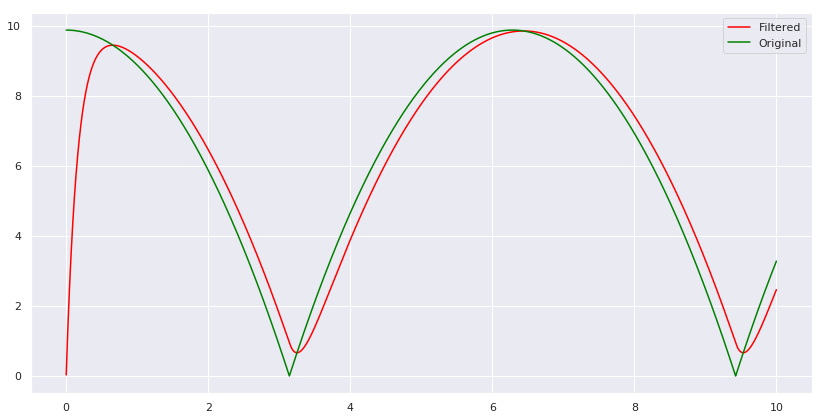

In [454]:
fig_4_lpf, axes_4_lpf = plt.subplots(figsize=(14,7))

axes_4_lpf.plot(time_4, lfp_output_4, c="red", label="Filtered")
axes_4_lpf.plot(time_4, signal_in_4, c="green", label="Original")

plt.legend()
plt.show()

## Task 2